In [1]:
import tensorflow as tf

from algos.convex_naf import ConvexNAFAlgorithm
from algos.ddpg import DDPG as MyDDPG
from qfunctions.convex_naf_qfunction import ConcaveNAF
from qfunctions.nn_qfunction import FeedForwardCritic
from qfunctions.quadratic_naf_qfunction import QuadraticNAF
from qfunctions.quadratic_qf import QuadraticQF
from policies.nn_policy import FeedForwardPolicy
from rllab.exploration_strategies.ou_strategy import OUStrategy

from rllab.envs.box2d.cartpole_env import CartpoleEnv
from rllab.envs.normalized_env import normalize

import matplotlib.pyplot as plt
import numpy as np

In [2]:
BATCH_SIZE = 128
N_EPOCHS = 10
EPOCH_LENGTH = 100
EVAL_SAMPLES = 100
DISCOUNT = 0.99
QF_LEARNING_RATE = 1e-3
POLICY_LEARNING_RATE = 1e-4
BATCH_LEARNING_RATE = 1e-2
SOFT_TARGET_TAU = 1e-2
REPLAY_POOL_SIZE = 1000000
MIN_POOL_SIZE = 256
SCALE_REWARD = 1.0
QF_WEIGHT_DECAY = 0.01
MAX_PATH_LENGTH = 1000
N_UPDATES_PER_TIME_STEP = 5

QF_TYPE = ''

In [3]:
env = normalize(CartpoleEnv())
policy_params = dict(
    observation_hidden_sizes=(100, 100),
    hidden_nonlinearity=tf.nn.relu,
    output_nonlinearity=tf.nn.tanh,
)
algo_params = dict(
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    epoch_length=EPOCH_LENGTH,
    eval_samples=EVAL_SAMPLES,
    discount=DISCOUNT,
#     policy_learning_rate=POLICY_LEARNING_RATE,
    qf_learning_rate=QF_LEARNING_RATE,
    soft_target_tau=SOFT_TARGET_TAU,
    replay_pool_size=REPLAY_POOL_SIZE,
    min_pool_size=MIN_POOL_SIZE,
    scale_reward=SCALE_REWARD,
    max_path_length=MAX_PATH_LENGTH,
    qf_weight_decay=QF_WEIGHT_DECAY,
)

es = OUStrategy(env_spec=env.spec)
# policy = FeedForwardPolicy(
#     name_or_scope="policy",
#     env_spec=env.spec,
#     **policy_params
# )
# qf = QuadraticNAF(
#     name_or_scope="quadratic_qfunction",
#     env_spec=env.spec,
# )
# qf = FeedForwardCritic(
#     name_or_scope="feed_forward_qfunction",
#     env_spec=env.spec,
# )
# algorithm = MyDDPG(
#     env,
#     es,
#     policy,
#     qf,
#     **algo_params
# )

optimizer_type = 'sgd'
qf = ConcaveNAF(
    name_or_scope="qf",
    env_spec=env.spec,
    optimizer_type=optimizer_type,
)
algorithm = ConvexNAFAlgorithm(
    env,
    es,
    qf,
    **algo_params
)


Making SGD optimizer
/Users/vitchyr/git/rail-rl/algos/naf.py
qf params =
['qf/advantage_function/observation_mlp/weights:0', 'qf/advantage_function/observation_mlp/bias:0', 'qf/advantage_function/z/Wz_1:0', 'qf/advantage_function/z/bz_1:0', 'qf/advantage_function/z/Wzu_1:0', 'qf/advantage_function/z/Wy_1:0', 'qf/advantage_function/z/by_1:0', 'qf/advantage_function/z/Wyu_1:0', 'qf/advantage_function/z/Wu_1:0', 'qf/advantage_function/z/b_1:0', 'qf/advantage_function/z/Wz_2:0', 'qf/advantage_function/z/bz_2:0', 'qf/advantage_function/z/Wzu_2:0', 'qf/advantage_function/z/Wy_2:0', 'qf/advantage_function/z/by_2:0', 'qf/advantage_function/z/Wyu_2:0', 'qf/advantage_function/z/Wu_2:0', 'qf/advantage_function/z/b_2:0', 'qf/V_function/hidden0/weights:0', 'qf/V_function/hidden0/bias:0', 'qf/V_function/hidden1/weights:0', 'qf/V_function/hidden1/bias:0', 'qf/V_function/weights:0', 'qf/V_function/bias:0']


In [4]:
policy = qf.implicit_policy

In [7]:
algorithm.train()

2016-12-16 10:03:52.988920 PST | Populating workers...
2016-12-16 10:03:52.990529 PST | Populated
2016-12-16 10:03:52.993512 PST | Epoch #0 | Training started
2016-12-16 10:04:14.684406 PST | Epoch #0 | Training finished. Time: 21.68956685066223
2016-12-16 10:04:14.685982 PST | Epoch #1 | Training started
2016-12-16 10:04:33.251191 PST | Epoch #1 | Training finished. Time: 18.562299013137817
2016-12-16 10:04:33.252856 PST | Epoch #2 | Training started
2016-12-16 10:04:48.233696 PST | Epoch #2 | Training finished. Time: 14.979077100753784
2016-12-16 10:04:48.235453 PST | Epoch #2 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:16


2016-12-16 10:05:20.526896 PST | Epoch #2 | Eval time: 32.29155993461609
2016-12-16 10:05:20.541979 PST | ---------------------  ----------
2016-12-16 10:05:20.547117 PST | Epoch                    2
2016-12-16 10:05:20.551491 PST | AverageReturn           91.9455
2016-12-16 10:05:20.559752 PST | QfLoss                  13.6301
2016-12-16 10:05:20.564259 PST | YsMean                   9.76823
2016-12-16 10:05:20.566752 PST | YsStd                    3.22748
2016-12-16 10:05:20.569047 PST | YsMax                   11.4575
2016-12-16 10:05:20.573464 PST | YsMin                    0
2016-12-16 10:05:20.575848 PST | QfOutputMean             8.66451
2016-12-16 10:05:20.579577 PST | QfOutputStd              0.473467
2016-12-16 10:05:20.582987 PST | QfOutputMax             10.7947
2016-12-16 10:05:20.594181 PST | QfOutputMin              7.97825
2016-12-16 10:05:20.595587 PST | TargetVfOutputMean       0.8144
2016-12-16 10:05:20.596819 PST | TargetVfOutputStd        0.236981
2016-12-16 10:05:

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:16


2016-12-16 10:06:17.150417 PST | Epoch #3 | Eval time: 39.20159101486206
2016-12-16 10:06:17.155208 PST | ---------------------  ---------
2016-12-16 10:06:17.160477 PST | Epoch                    3
2016-12-16 10:06:17.164166 PST | AverageReturn           73.788
2016-12-16 10:06:17.167526 PST | QfLoss                  20.9694
2016-12-16 10:06:17.170711 PST | YsMean                  13.5023
2016-12-16 10:06:17.173573 PST | YsStd                    4.98264
2016-12-16 10:06:17.177010 PST | YsMax                   16.2971
2016-12-16 10:06:17.179734 PST | YsMin                    0
2016-12-16 10:06:17.182263 PST | QfOutputMean            14.321
2016-12-16 10:06:17.187410 PST | QfOutputStd              1.22536
2016-12-16 10:06:17.190180 PST | QfOutputMax             16.3797
2016-12-16 10:06:17.192431 PST | QfOutputMin             10.4513
2016-12-16 10:06:17.194736 PST | TargetVfOutputMean       5.40634
2016-12-16 10:06:17.197122 PST | TargetVfOutputStd        0.37902
2016-12-16 10:06:17.2014

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:21


2016-12-16 10:07:19.156842 PST | Epoch #4 | Eval time: 40.22462797164917
2016-12-16 10:07:19.160862 PST | ---------------------  ---------
2016-12-16 10:07:19.168512 PST | Epoch                    4
2016-12-16 10:07:19.173802 PST | AverageReturn           85.4062
2016-12-16 10:07:19.179920 PST | QfLoss                  25.2618
2016-12-16 10:07:19.185879 PST | YsMean                  19.1626
2016-12-16 10:07:19.191358 PST | YsStd                    6.63298
2016-12-16 10:07:19.196250 PST | YsMax                   22.6894
2016-12-16 10:07:19.200048 PST | YsMin                    0
2016-12-16 10:07:19.204905 PST | QfOutputMean            19.0148
2016-12-16 10:07:19.210845 PST | QfOutputStd              2.7698
2016-12-16 10:07:19.216110 PST | QfOutputMax             22.2763
2016-12-16 10:07:19.221314 PST | QfOutputMin             11.3505
2016-12-16 10:07:19.226003 PST | TargetVfOutputMean      11.6574
2016-12-16 10:07:19.229165 PST | TargetVfOutputStd        1.08922
2016-12-16 10:07:19.2353

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:19


2016-12-16 10:08:17.843893 PST | Epoch #5 | Eval time: 39.41037917137146
2016-12-16 10:08:17.847964 PST | ---------------------  ---------
2016-12-16 10:08:17.850357 PST | Epoch                    5
2016-12-16 10:08:17.852907 PST | AverageReturn           78.2665
2016-12-16 10:08:17.855239 PST | QfLoss                  37.4776
2016-12-16 10:08:17.856768 PST | YsMean                  24.9054
2016-12-16 10:08:17.859168 PST | YsStd                    9.21298
2016-12-16 10:08:17.861696 PST | YsMax                   31.1996
2016-12-16 10:08:17.864260 PST | YsMin                    0
2016-12-16 10:08:17.866601 PST | QfOutputMean            25.1054
2016-12-16 10:08:17.869172 PST | QfOutputStd              5.05113
2016-12-16 10:08:17.871671 PST | QfOutputMax             31.3787
2016-12-16 10:08:17.874370 PST | QfOutputMin             10.4583
2016-12-16 10:08:17.876883 PST | TargetVfOutputMean      18.5257
2016-12-16 10:08:17.879218 PST | TargetVfOutputStd        2.50659
2016-12-16 10:08:17.881

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:14


2016-12-16 10:09:06.751201 PST | Epoch #6 | Eval time: 30.239065170288086
2016-12-16 10:09:06.754533 PST | ---------------------  ---------
2016-12-16 10:09:06.756355 PST | Epoch                    6
2016-12-16 10:09:06.757891 PST | AverageReturn           73.2801
2016-12-16 10:09:06.759326 PST | QfLoss                  39.4801
2016-12-16 10:09:06.761667 PST | YsMean                  28.61
2016-12-16 10:09:06.763056 PST | YsStd                   11.3983
2016-12-16 10:09:06.764706 PST | YsMax                   38.2449
2016-12-16 10:09:06.766301 PST | YsMin                    0
2016-12-16 10:09:06.767920 PST | QfOutputMean            28.8557
2016-12-16 10:09:06.770623 PST | QfOutputStd              6.97601
2016-12-16 10:09:06.772047 PST | QfOutputMax             37.3229
2016-12-16 10:09:06.773451 PST | QfOutputMin             10.0613
2016-12-16 10:09:06.776468 PST | TargetVfOutputMean      23.3488
2016-12-16 10:09:06.778807 PST | TargetVfOutputStd        4.61543
2016-12-16 10:09:06.78018

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:18


2016-12-16 10:10:01.960834 PST | Epoch #7 | Eval time: 38.232856035232544
2016-12-16 10:10:01.963669 PST | ---------------------  ---------
2016-12-16 10:10:01.966461 PST | Epoch                    7
2016-12-16 10:10:01.969197 PST | AverageReturn           73.7893
2016-12-16 10:10:01.971300 PST | QfLoss                  36.0876
2016-12-16 10:10:01.973391 PST | YsMean                  30.822
2016-12-16 10:10:01.975102 PST | YsStd                   13.3822
2016-12-16 10:10:01.976737 PST | YsMax                   45.4841
2016-12-16 10:10:01.978066 PST | YsMin                    0
2016-12-16 10:10:01.980876 PST | QfOutputMean            28.6602
2016-12-16 10:10:01.983003 PST | QfOutputStd             10.4111
2016-12-16 10:10:01.985642 PST | QfOutputMax             42.0931
2016-12-16 10:10:01.988186 PST | QfOutputMin              2.7511
2016-12-16 10:10:01.990359 PST | TargetVfOutputMean      26.3493
2016-12-16 10:10:01.992592 PST | TargetVfOutputStd        7.76067
2016-12-16 10:10:01.99389

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:21


2016-12-16 10:11:08.892183 PST | Epoch #8 | Eval time: 42.83587718009949
2016-12-16 10:11:08.895792 PST | ---------------------  ---------
2016-12-16 10:11:08.899305 PST | Epoch                    8
2016-12-16 10:11:08.902855 PST | AverageReturn          104.945
2016-12-16 10:11:08.905514 PST | QfLoss                  34.7473
2016-12-16 10:11:08.908846 PST | YsMean                  37.8326
2016-12-16 10:11:08.912060 PST | YsStd                   14.7872
2016-12-16 10:11:08.913797 PST | YsMax                   52.7442
2016-12-16 10:11:08.916977 PST | YsMin                    0
2016-12-16 10:11:08.919218 PST | QfOutputMean            34.5749
2016-12-16 10:11:08.921304 PST | QfOutputStd             12.0099
2016-12-16 10:11:08.924038 PST | QfOutputMax             48.0055
2016-12-16 10:11:08.926618 PST | QfOutputMin              2.52608
2016-12-16 10:11:08.928852 PST | TargetVfOutputMean      32.5069
2016-12-16 10:11:08.931275 PST | TargetVfOutputStd        9.47761
2016-12-16 10:11:08.93368

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:24


2016-12-16 10:12:17.040901 PST | Epoch #9 | Eval time: 47.73180890083313
2016-12-16 10:12:17.044212 PST | ---------------------  ---------
2016-12-16 10:12:17.046705 PST | Epoch                    9
2016-12-16 10:12:17.049984 PST | AverageReturn          123.693
2016-12-16 10:12:17.051708 PST | QfLoss                  20.6135
2016-12-16 10:12:17.054558 PST | YsMean                  41.3172
2016-12-16 10:12:17.057554 PST | YsStd                   16.7651
2016-12-16 10:12:17.059952 PST | YsMax                   57.012
2016-12-16 10:12:17.062939 PST | YsMin                    0
2016-12-16 10:12:17.065712 PST | QfOutputMean            38.7544
2016-12-16 10:12:17.067600 PST | QfOutputStd             14.3915
2016-12-16 10:12:17.070236 PST | QfOutputMax             53.7171
2016-12-16 10:12:17.072933 PST | QfOutputMin              4.71422
2016-12-16 10:12:17.075541 PST | TargetVfOutputMean      35.7984
2016-12-16 10:12:17.078537 PST | TargetVfOutputStd       12.3931
2016-12-16 10:12:17.080880 

In [4]:
a_dim = qf.action_dim
o_dim = qf.observation_dim
o_high = env.spec.action_space.high[0]
o_low = env.spec.action_space.low[0]
print(a_dim)
print(o_dim)
print(o_high)
print(o_low)

1
4
1.0
-1.0


# Plot QF

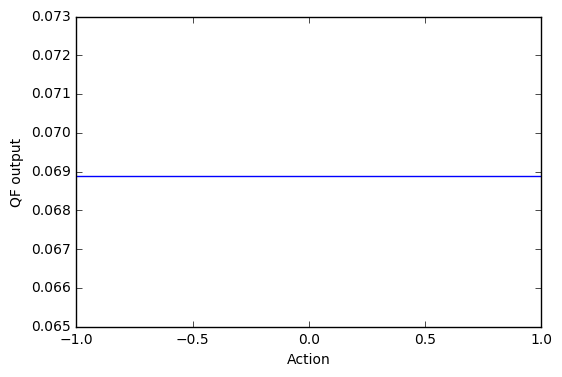

In [11]:
num_actions = 100

actions = np.linspace(-1, 1, num_actions)
actions = np.expand_dims(actions, axis=1)
random_state_single = np.random.rand(1, o_dim)
random_state = np.vstack([random_state_single for _ in range(num_actions)])

feed_dict = {
    qf.action_input: actions,
    qf.observation_input: random_state,
}
qf_output = qf.sess.run(
    qf.output,
    feed_dict=feed_dict
)

# plt.plot(np.tanh(actions), qf_output)
plt.plot(actions, qf_output)
plt.xlabel('Action')
plt.ylabel('QF output')
plt.show()

# Inspect correctness of this quadratic function

In [8]:
feed_dict = {
    qf.action_input: actions,
    qf.observation_input: random_state,
}
L_params, L, implicit_policy_output = qf.sess.run(
    [qf._internal_qf.L_params.output, qf._internal_qf.L, qf.implicit_policy.output],
    feed_dict=feed_dict
)

expected_values = -0.5 * ((actions - implicit_policy_output) * L[0][0][0])**2
plt.plot(actions, expected_values)
plt.xlabel('Action')
plt.ylabel('Expected QF output')
plt.show()

AttributeError: 'FeedForwardCritic' object has no attribute '_internal_qf'

In [9]:
plt.plot(actions, np.abs(expected_values - qf_output))
plt.xlabel('Action')
plt.ylabel('QF output error')
plt.show()

NameError: name 'expected_values' is not defined

Make sure diagonal values are exponentiated corrected

In [10]:
print(L[0])
print(np.exp(L_params[0]))

NameError: name 'L' is not defined

Make sure max action is the one taken by the implicit policy

In [8]:
max_index = np.argmax(qf_output, axis=0)
print(actions[max_index])
print(implicit_policy_output[0])

[[-1.]]


NameError: name 'implicit_policy_output' is not defined

# Plot implicit policy

[[-1.          0.43246771  0.84345072 -0.56658289]
 [-0.997998    0.43246771  0.84345072 -0.56658289]
 [-0.995996    0.43246771  0.84345072 -0.56658289]
 ..., 
 [ 0.995996    0.43246771  0.84345072 -0.56658289]
 [ 0.997998    0.43246771  0.84345072 -0.56658289]
 [ 1.          0.43246771  0.84345072 -0.56658289]]


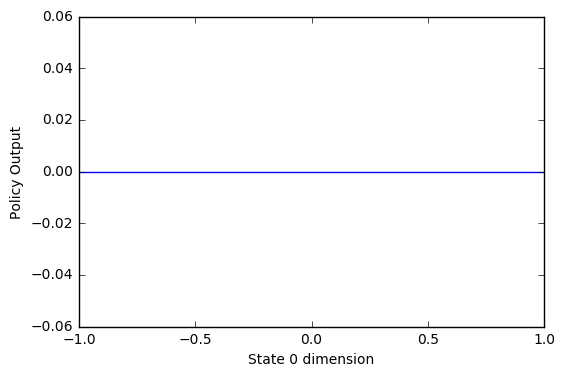

[[ 0.17991664 -1.          0.8455713  -0.51282439]
 [ 0.17991664 -0.997998    0.8455713  -0.51282439]
 [ 0.17991664 -0.995996    0.8455713  -0.51282439]
 ..., 
 [ 0.17991664  0.995996    0.8455713  -0.51282439]
 [ 0.17991664  0.997998    0.8455713  -0.51282439]
 [ 0.17991664  1.          0.8455713  -0.51282439]]


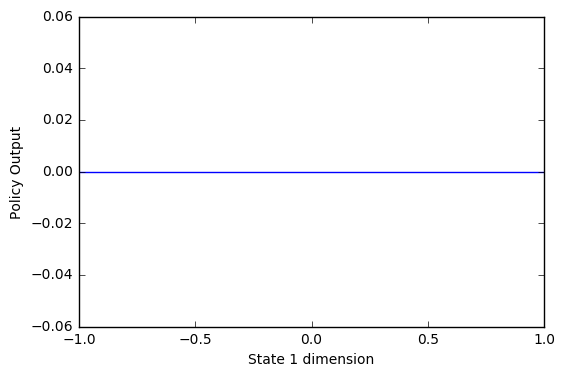

[[-0.45446781  0.81143553 -1.         -0.65910281]
 [-0.45446781  0.81143553 -0.997998   -0.65910281]
 [-0.45446781  0.81143553 -0.995996   -0.65910281]
 ..., 
 [-0.45446781  0.81143553  0.995996   -0.65910281]
 [-0.45446781  0.81143553  0.997998   -0.65910281]
 [-0.45446781  0.81143553  1.         -0.65910281]]


KeyboardInterrupt: 

In [11]:
o_delta = o_high - o_low
for dim_changing in range(4):
    num_states = 1000
    base_state = np.random.rand(1, o_dim) * o_delta + o_low
#     base_state = np.zeros((1, o_dim))
    linear_states = np.vstack([base_state for _ in range(num_states)])
    linear_states[:, dim_changing] = np.linspace(o_low, o_high, num_states)
    print(linear_states)
    
    policy_output = np.vstack([policy.get_action(state)[0] for state in linear_states])
    
    plt.plot(linear_states[:, dim_changing], policy_output)
    plt.xlabel('State {0} dimension'.format(dim_changing))
    plt.ylabel('Policy Output')
    plt.show()